## Assignment A1b: Functions and Computation

### David Courtney 3643806


In [1]:
function timetoindex(t; fs=1000)
    index = round(Int, t * fs)
    return index
end

function phase_shift(f=1.0, d=0.0)
    return (2 * pi * f * d)
end

function sinewave(t; f=1.0, d=0.0)
    return sin.(2 * pi * f * (t .- d))
end

function gabor(t, f, sigma, phi, a)
    return a .* exp.(- (t.^2) ./ (2 * sigma^2)) .* cos.(2pi * f .* t .+ phi)
end

function gaboro(t; f, sigma, a=1)
    return gabor(t, f, sigma, (pi/2), a)
end

function gabore(t; f, sigma, a=1)
    return gabor(t, f, sigma, 0, a)
end

function gabor_norm(f, sigma, phi, fs)
    t_range_start        = -4 * sigma
    t_range_stop         =  4 * sigma
    num_samples          = Int((8 + sigma) * sigma * fs)
    t_samples            = range(t_range_start, stop=t_range_stop, length=num_samples)
    gabor_values_squared = [gabor(t, f, sigma, phi, 1)^2 for t in t_samples]
    sum_of_squares       = sum(gabor_values_squared)
    return sqrt(sum_of_squares)
end

function gabore_norm(; f, sigma, fs)
    return gabor_norm(f, sigma, 0, fs)
end

function gaboro_norm(f=f, sigma=sigma, fs=fs)
    return gabor_norm(f=f, sigma=sigma, phi=pi/2, fs=fs)
end

function localmaxima(signal)
    idx = []
    for i in 2:length(signal) - 1
        if signal[i-1] < signal[i] > signal[i+1]
            push!(idx, i - 1)
        end
    end
    return idx
end

function ERB(f)
    return 24.7 * (4.37 * f / 1000 + 1)
end

function gammatone(t; f=100, n=4, a=1, phi=0)
    b = 1.019 * ERB(f)
    return a * t .^ (n - 1) .* exp.(-2 * pi * b * t) .* cos.(2 * pi * f * t .+ phi)
end

function gammatone_norm(f, fs, n=4)
    duration = 1
    t = range(0, stop=duration, length=Int(fs * duration))
    g = [gammatone(ti; f=f, n=n, a=1, phi=0) for ti in t]
    a = 1 / sqrt(sum(g .^ 2) / length(t))
    return (a / f)
end

function crossings(f; threshold=0, dir="both")
    idxs = Int[]
    for i in 1:length(f)-1
        if (dir == "negpos" && f[i] < threshold && f[i+1] >= threshold) ||
           (dir == "posneg" && f[i] >= threshold && f[i+1] < threshold) ||
           (dir == "both" && ((f[i] < threshold && f[i+1] >= threshold) || (f[i] >= threshold && f[i+1] < threshold)))
            push!(idxs, i)
        end
    end
    return idxs
end

function envelope(y; nblocks=ceil(Int, length(y)/10))
    block_size = ceil(Int, length(y) / nblocks)
    ylower = Float64[]
    yupper = Float64[]
    blockindices = Int[]

    for i in 1:nblocks
        start_idx = (i - 1) * block_size + 1
        end_idx = min(i * block_size, length(y))
        push!(blockindices, start_idx)
        push!(ylower, minimum(y[start_idx:end_idx]))
        push!(yupper, maximum(y[start_idx:end_idx]))
    end

    return ylower, yupper, blockindices
end


envelope (generic function with 1 method)

### 1a. `sinewave`


In [2]:
# Problem #1
timetoindex(0.25; fs=1000)


250

In [3]:
# Problem #2
sinewave(0.0; f=5, d=0.05)


-1.0

### 1b. `gabor`


In [4]:
# Problem #3
gabore(0.0; f=100, sigma=0.01)


1.0

In [5]:
# Problem #4
gaboro(-3; f=0.0625, sigma=8)


0.8611504148937256

In [6]:
# Problem #5
gabore_norm(f=100, sigma=0.01, fs=10000)

9.41396254918731

In [7]:
# Problem #6
f     = 100
fs    = 10000
sigma = 0.01
#a     = 1

a = 1 / gabor_norm(f, sigma, 0, fs)
gaboro(0.003; f=100, sigma=0.01, a=a)


-0.09658075756182158

In [8]:
# Problem #7
fs = 10000
f  = 100
a  = gammatone_norm(f, fs)
gammatone(0.01; f=f, a)


0.10873875710573636

In [9]:
# Problem #8
element = localmaxima([1 3 2 -2 2 4 8 6])
println("The second element in the array is: ", element[2])


The second element in the array is: 6


In [10]:
# Problem #9
element = crossings([-1 0 1 2 0 -2]; threshold=1, dir="both")
println("The second element in the array is: ", element[2])


The second element in the array is: 4


In [11]:
# Problem #10
y = [5, 5, 2, 3, 4, 3, -6, -9, 0, -3, 9, -7]
ylower, yupper, blockindices = envelope(y; nblocks=3)
println("The index of the second envelope block is: ", blockindices[2] - 1)

The index of the second envelope block is: 4


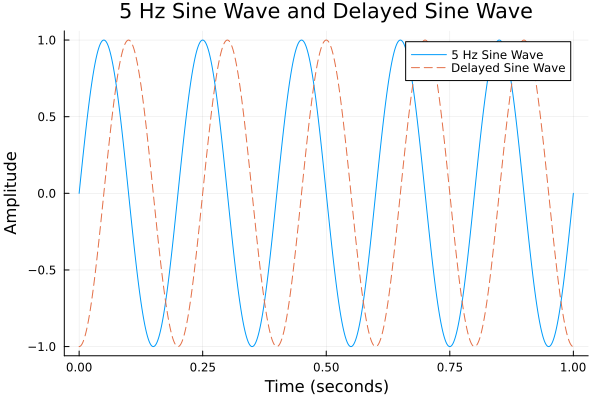

In [12]:
# Problem 11

using Plots

f = 5.0
t = range(0, stop=1.0, length=1000)

sine_wave         = sinewave(t; f=f, d=0.00)
delayed_sine_wave = sinewave(t; f=f, d=0.05)

plot(t, sine_wave, label="5 Hz Sine Wave", linestyle=:solid, title="5 Hz Sine Wave and Delayed Sine Wave",
     xlabel="Time (seconds)", ylabel="Amplitude")
plot!(t, delayed_sine_wave, label="Delayed Sine Wave", linestyle=:dash)


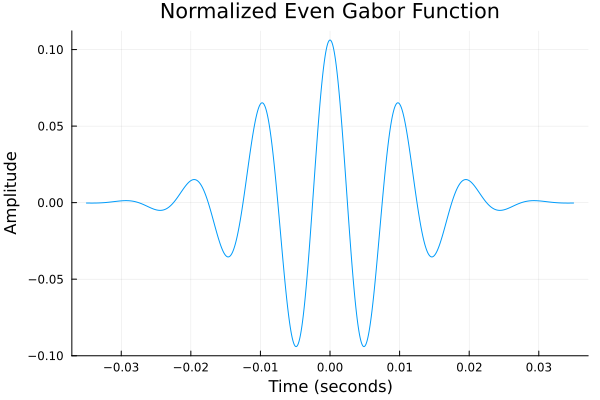

In [13]:
# Problem #12
using Plots

f     = 100
fs    = 10000
sigma = 1/f
t     = range(-0.035, 0.035, length=fs)
a     = 1 / gabore_norm(;f, sigma, fs)

gabor_values = [gabore(t; f, sigma, a) for t in t]

plot(t, gabor_values, title="Normalized Even Gabor Function", xlabel="Time (seconds)", ylabel="Amplitude", legend=false)


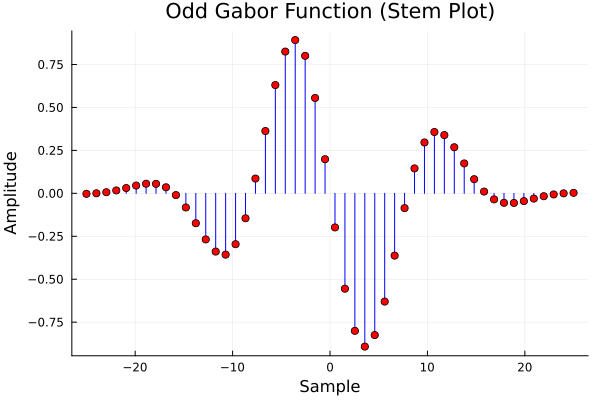

In [14]:
# Problem #13

using Plots

f = 1/16
sigma = 8
num_samples = 50

t = range(-num_samples / 2, stop=num_samples / 2, length=num_samples)
gabor_values = gaboro(t; f, sigma, a=1)

p = plot(title="Odd Gabor Function (Stem Plot)", xlabel="Sample", ylabel="Amplitude")
for i in eachindex(t)
    plot!([t[i], t[i]], [0, gabor_values[i]], color=:blue, legend=false)
end
scatter!(t, gabor_values, color=:red, legend=false)


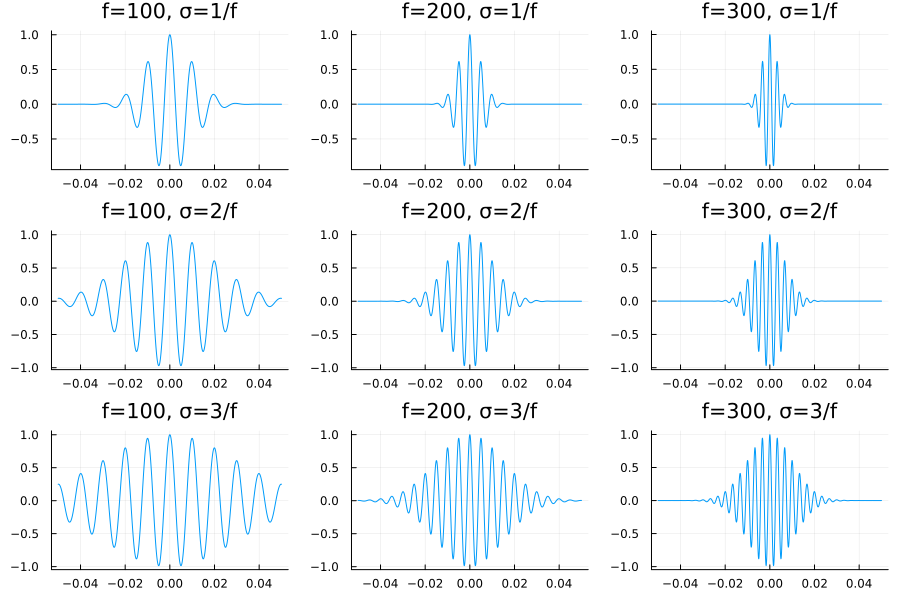

In [15]:
#Problem #14

using Plots

frequencies = [100, 200, 300]
widths_n = [1, 2, 3]
t = range(-0.05, stop=0.05, length=1000)

p = plot(layout = (3, 3), size = (900, 600))

for n in widths_n
    for f in frequencies
        sigma = n / f
        g = gabor(t, f, sigma, 0, 1)
        plot!(t, g, subplot = (length(widths_n) * (n - 1) + findfirst(==(f), frequencies)), 
              title = "f=$(f), σ=$(n)/f", legend = false)
    end
end

p

### 1c. `gammatone`


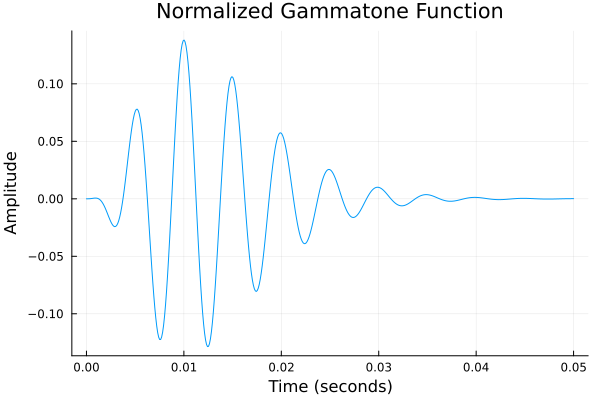

In [16]:
# Problem #15

using Plots

f   = 200
n   = 4
phi = 0
fs  = 10000

t = range(0, stop=0.05, length=Int(0.05 * fs))

gammatone_values     = gammatone(t; f=f, n=n, a=1, phi=phi)
norm_constant        = sqrt(sum(gammatone_values .^ 2))
gammatone_normalized = gammatone_values / norm_constant

plot(t, gammatone_normalized, title="Normalized Gammatone Function", xlabel="Time (seconds)", ylabel="Amplitude", legend=false)


### 2. Simple computation

### 2a. `localmaxima`


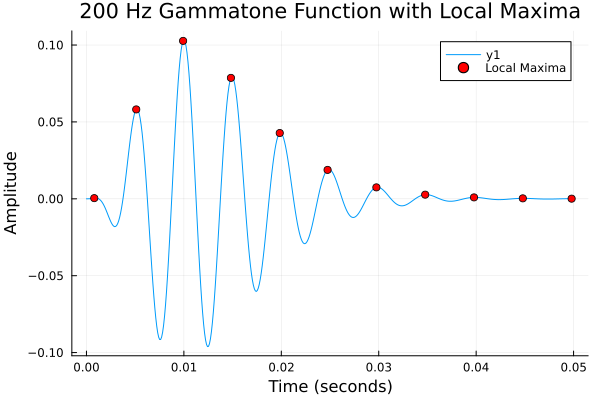

In [17]:
# Problem #16

using Plots

f = 200
n = 4
phi = 0
fs = 10000
a = f * fs

t = range(0, stop=0.05, length=Int(0.05 * fs))
gammatone_values = gammatone(t; f=f, n=n, a=a, phi=phi)
maxima_indices = localmaxima(gammatone_values)

plot(t, gammatone_values, title="200 Hz Gammatone Function with Local Maxima", xlabel="Time (seconds)", ylabel="Amplitude")
scatter!(t[maxima_indices], gammatone_values[maxima_indices], color=:red, label="Local Maxima")


### 2b. `crossings`

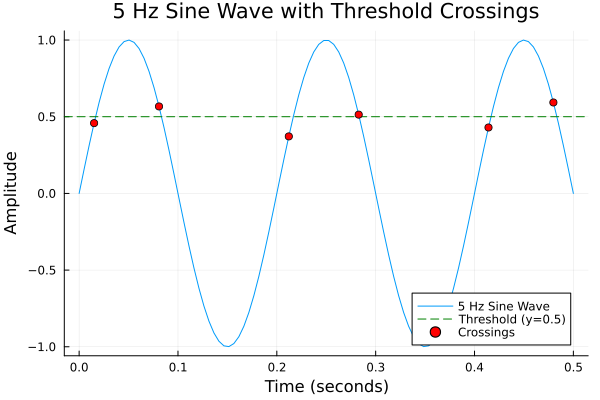

In [18]:
# Problem #17

using Plots

f = 5
fs = 200
t = range(0, stop=0.5, length=Int(0.5 * fs))

sine_wave = sinewave(t; f=f, d=0)

threshold = 0.5

crossing_indices = crossings(sine_wave; threshold=threshold, dir="both")

plot(t, sine_wave, title="5 Hz Sine Wave with Threshold Crossings", xlabel="Time (seconds)", ylabel="Amplitude", label="5 Hz Sine Wave")
hline!([threshold], color=:green, linestyle=:dash, label="Threshold (y=0.5)")
scatter!(t[crossing_indices], sine_wave[crossing_indices], color=:red, label="Crossings")


### 2c. `envelope`


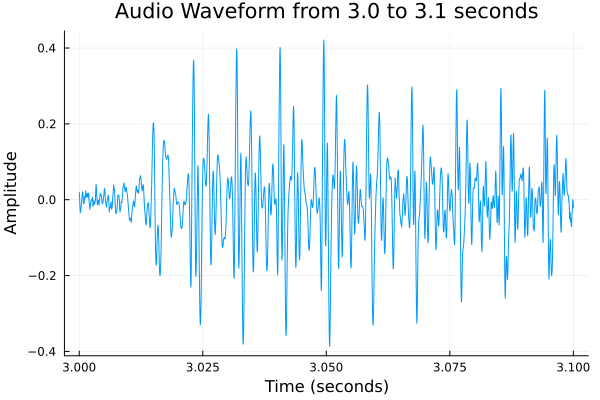

In [19]:
# Problem #18

using WAV
using Plots

file_path = "speech.wav"
y, fs = wavread(file_path)

if size(y, 2) > 1
    y = y[:, 1]
end

start_time = 3.0
end_time = 3.1
start_index = Int(start_time * fs) + 1
end_index = Int(end_time * fs)
segment = y[start_index:end_index]

t = range(start_time, stop=end_time, length=length(segment))

plot(t, segment, title="Audio Waveform from 3.0 to 3.1 seconds", xlabel="Time (seconds)", ylabel="Amplitude", legend=false)


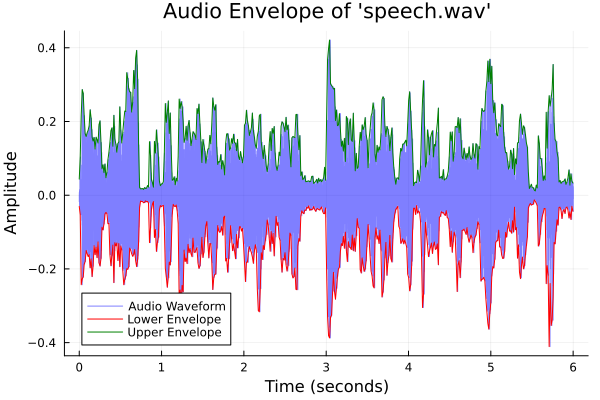

In [20]:
# Problem #19

using WAV
using Plots

file_path = "speech.wav"
y, fs = wavread(file_path)

if size(y, 2) > 1
    y = y[:, 1]
end

ylower, yupper, blockindices = envelope(y, nblocks=500)

t = range(0, stop=length(y)/fs, length=length(y))

plot(t, y, label="Audio Waveform", color=:blue, alpha=0.5)
plot!(t[blockindices], ylower, label="Lower Envelope", color=:red)
plot!(t[blockindices], yupper, label="Upper Envelope", color=:green)
title!("Audio Envelope of 'speech.wav'")
xlabel!("Time (seconds)")
ylabel!("Amplitude")
